In [4]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving All Years Air Quality Calculations.csv to All Years Air Quality Calculations.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv('All Years Air Quality Calculations.csv')

In [4]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   geoid                      7479 non-null   object 
 1   geoid20                    7479 non-null   int64  
 2   year                       7479 non-null   int64  
 3   denom_total_pop            7479 non-null   int64  
 4   pm25_concentration         7479 non-null   float64
 5   pm25_concentration_pctile  7479 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 350.7+ KB
None
            geoid20         year  denom_total_pop  pm25_concentration  \
count  7.479000e+03  7479.000000      7479.000000         7479.000000   
mean   6.037403e+09  2017.333333      3971.765076           11.640572   
std    2.303562e+05     2.867633      1417.087968            1.413307   
min    6.037101e+09  2014.000000         0.000000            0.000000   
25%    6.037

In [7]:
# Handling missing values
df = df.dropna()

In [8]:
# Selecting numerical features (using 'pm25_concentration' as target)
y = df['pm25_concentration']
X = df.drop(columns=['pm25_concentration', 'geoid', 'geoid20'])  # Dropping non-numeric identifiers

In [9]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Predictions
y_pred = model.predict(X_test)


In [13]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 0.021160288595819414
MSE: 0.01251831705681842
R2 Score: 0.9932768321827029


In [15]:
# Determine the AQI category based on the predicted PM2.5 concentration
for aqi_pm25 in y_pred:
    if aqi_pm25 <= 50:
        category = "Good"
    elif aqi_pm25 <= 100:
        category = "Moderate"
    elif aqi_pm25 <= 150:
        category = "Unhealthy for Sensitive Groups"
    elif aqi_pm25 <= 200:
        category = "Unhealthy"
    elif aqi_pm25 <= 300:
        category = "Very Unhealthy"
    else:
        category = "Hazardous"
    print(f"Predicted PM2.5: {aqi_pm25}, Category: {category}")

Predicted PM2.5: 10.370000000000003, Category: Good
Predicted PM2.5: 12.52999999999998, Category: Good
Predicted PM2.5: 11.880000000000011, Category: Good
Predicted PM2.5: 12.050000000000027, Category: Good
Predicted PM2.5: 12.050000000000027, Category: Good
Predicted PM2.5: 11.23380000000001, Category: Good
Predicted PM2.5: 12.467600000000019, Category: Good
Predicted PM2.5: 12.396800000000006, Category: Good
Predicted PM2.5: 12.119999999999987, Category: Good
Predicted PM2.5: 13.145000000000017, Category: Good
Predicted PM2.5: 10.370000000000003, Category: Good
Predicted PM2.5: 11.679999999999989, Category: Good
Predicted PM2.5: 11.799999999999978, Category: Good
Predicted PM2.5: 9.86800001099999, Category: Good
Predicted PM2.5: 9.068000012999994, Category: Good
Predicted PM2.5: 12.369999999999983, Category: Good
Predicted PM2.5: 12.890000000000017, Category: Good
Predicted PM2.5: 12.049999999999978, Category: Good
Predicted PM2.5: 12.890000000000017, Category: Good
Predicted PM2.5: 

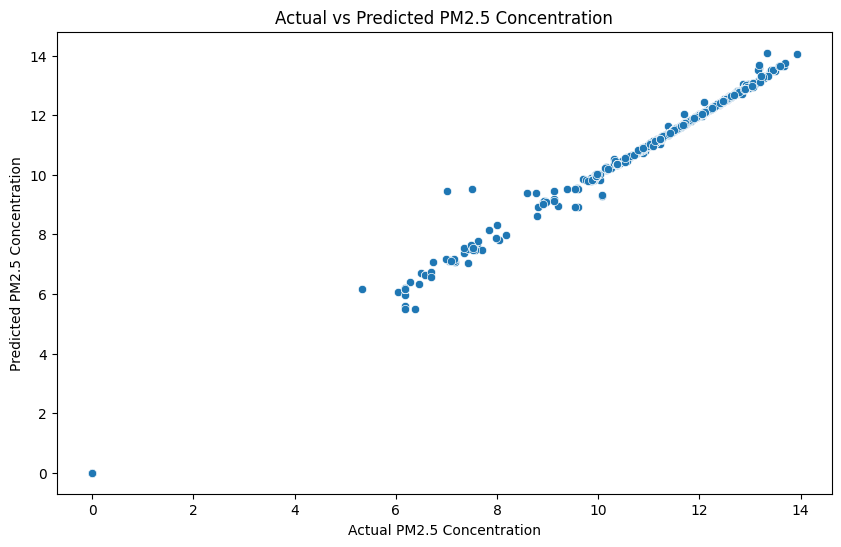

In [16]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual PM2.5 Concentration")
plt.ylabel("Predicted PM2.5 Concentration")
plt.title("Actual vs Predicted PM2.5 Concentration")
plt.show()